In [1]:
import pandas as pd

train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra', header=None)
test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes', header=None)

In [14]:
X_train = train[list(range(0, 64))]
X_test = test[list(range(0, 64))]
y_train = train[64]
y_test = test[64]

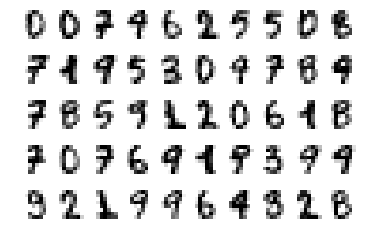

[[0 0 7 4 6 2 5 5 0 8]
 [7 1 9 5 3 0 4 7 8 4]
 [7 8 5 9 1 2 0 6 1 8]
 [7 0 7 6 9 1 9 3 9 4]
 [9 2 1 9 9 6 4 3 2 8]]


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

idx = 0
for i in range(50):
    plt.subplot(5, 10, idx+1)
    plt.imshow(
        X_train.iloc[idx].values.reshape(8,8),
        cmap=plt.cm.gray_r,
        interpolation='nearest'
    )
    plt.axis('off')
    idx += 1
plt.show()

print(y_train.iloc[0:50].values.reshape(5,10))

In [16]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=1, gamma=0.001, random_state=1)

In [17]:
model.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
from sklearn.metrics import accuracy_score

y_predict = model.predict(X_test)
score = accuracy_score(y_test, y_predict)
score

0.98274902615470228

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


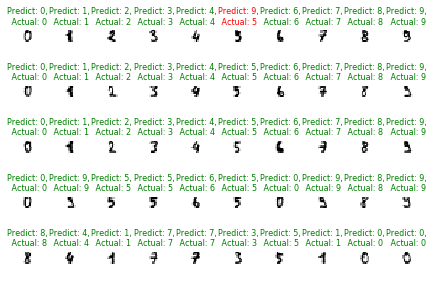

In [19]:
idx = 0
fig = plt.figure()
for i in range(50):
    plt.subplot(5, 10, idx+1)
    plt.imshow(
        X_test.iloc[idx].values.reshape(8,8),
        cmap=plt.cm.gray_r,
        interpolation='nearest'
    )
    fontcolor = 'g' if y_test[idx] == y_predict[idx] else 'r'
    plt.title('Predict: %i,\n Actual: %i' % (y_predict[idx], y_test[idx]), fontsize=8, color=fontcolor)
    plt.axis('off')
    idx += 1
fig.set_tight_layout(True)
plt.show()

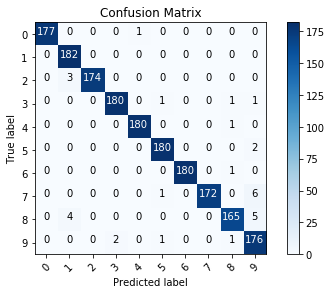

In [20]:
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)

classes = range(10)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

[0]